In [4]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import mysql.connector
from dotenv import load_dotenv

In [5]:
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
database = 'SwiftMarket'

In [6]:
connection =  mysql.connector.connect( 
                                    user=user,
                                    password=password,
                                    host=host,
                                    database=database
                                    )
cursor = connection.cursor()

DatabaseError: 2017 (HY000): Can't open named pipe to host: .  pipe: MySQL (2)

In [ ]:
cursor = connection.cursor()

In [1]:
def read_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()    
    return pd.DataFrame(data=rows,columns=cursor.column_names)

In [2]:
query = '''select * from customers limit 5'''
read_query(query)

NameError: name 'cursor' is not defined

In [ ]:
query = '''select
 monthname(saledate) as monthnames,
 e.firstname,
 sum(s.totalprice) as totalprice
 from salesdata s
 join employees e
 on s.employeeid = e.employeeid
 where monthname(saledate)= 'January'
 group by monthname(s.saledate),e.firstname
 order by totalprice desc
 limit 10;
 '''
read_query(query)

NameError: name 'read_query' is not defined

In [ ]:
df = read_query(query = query)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   monthnames  10 non-null     object
 1   firstname   10 non-null     object
 2   totalprice  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [ ]:
df['totalprice'] = df['totalprice'].astype('float')

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [ ]:
cmap_val = np.linspace(0.3,1,10)
print(cmap_val)

[0.3        0.37777778 0.45555556 0.53333333 0.61111111 0.68888889
 0.76666667 0.84444444 0.92222222 1.        ]


In [ ]:
import matplotlib.cm as cm

In [ ]:
cmap = plt.cm.PiYG(cmap_val)

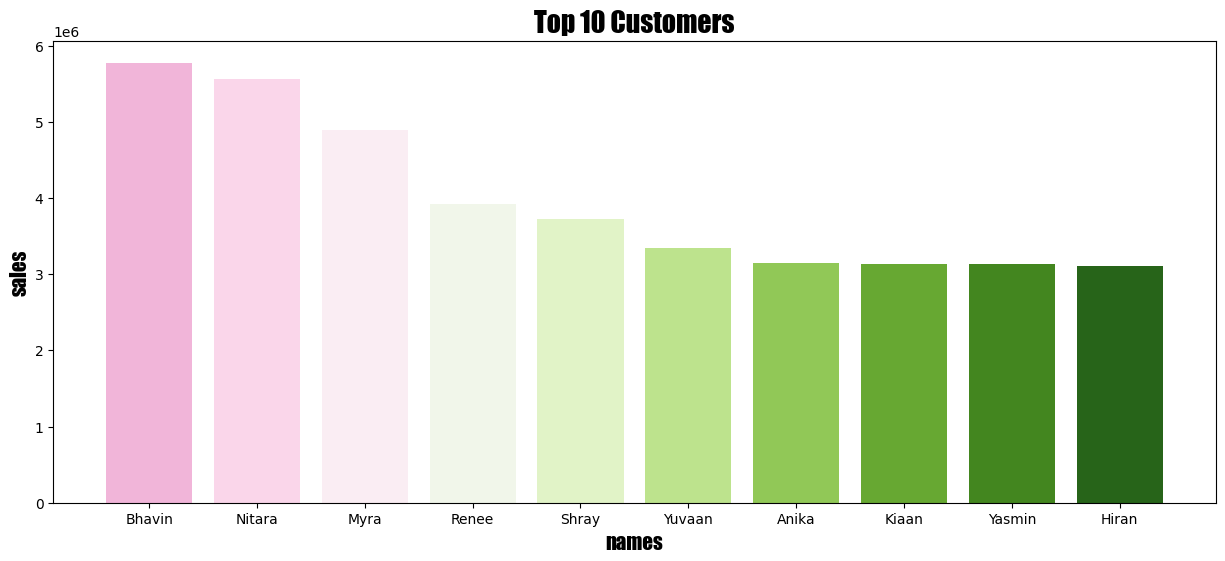

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(df['totalprice'],df['firstname'],color ='green',marker ='o')
plt.bar(data = df,x = 'firstname',height = 'totalprice',color = cmap)
plt.title('Top 10 Customers',fontsize = 20, fontname='impact')
plt.xlabel('names',fontsize = 15,fontname ='impact' )
plt.ylabel('sales',fontsize = 15,fontname ='impact')
plt.savefig('figure.png')
plt.show()

#plt.savefig('top annual customer.png')

 Provide a visual representation of our annual sales performance over time?

In [ ]:
query = '''select months ,total from
(select month(saledate),monthname(saledate) as months, sum(Totalprice) as total
 from salesdata
 group by months,month(saledate)
 order by month(saledate)) t;
 '''
read_query(query)


NameError: name 'read_query' is not defined

In [ ]:
df = read_query(query = query)

NameError: name 'read_query' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   months  12 non-null     object
 1   total   12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [ ]:
months = df['months'].values
sales = df['total'].astype('float').values

NameError: name 'df' is not defined

In [ ]:
annual_avg = df['total'].mean()

In [ ]:
goal = annual_avg*1.05

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(months,sales,color = 'g',marker ='*')
plt.axhline(y=annual_avg,color ='r',ls = 'dotted')
plt.axhline(y=goal,color ='y',ls = 'dotted')
plt.savefig('figure.png')

NameError: name 'months' is not defined

<Figure size 1500x500 with 0 Axes>

2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique

In [ ]:
query = '''SELECT 
    MONTH(saledate) AS sales_month,
    SUM(totalprice) AS total_sale,
    AVG(SUM(totalprice)) OVER (ORDER BY MONTH(saledate) ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS rolling_avg
FROM 
    salesdata
GROUP BY 
    MONTH(saledate);'''

read_query(query)

,sales_month,total_sale,rolling_avg
0,1,155340130.00,155340130.000000
1,2,140345189.00,147842659.500000
2,3,151612551.00,149099290.000000
3,4,150691604.00,147549781.333333
4,5,163734120.00,155346091.666667
5,6,143529379.00,152651701.000000
6,7,149811843.00,152358447.333333
7,8,158477094.00,150606105.333333
8,9,146743920.00,151677619.000000
9,10,143488837.00,149569950.333333
